# HW4#2 Random Forest

# Data processing and split the data

In [1]:
import csv
import numpy
import scipy
from copy import deepcopy
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import random
import math
from operator import itemgetter
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



data_list=[]
y=[]
data=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/HW4/allhyper.data'))
for row in data:
    data_list.append(row)
features=deepcopy(data_list[0])
data_list.pop(0)

####convert string to int
for i in range(len(data_list)):
    if data_list[i][29]=='negative.':
        data_list[i][29]=0
    else:
        data_list[i][29]=1
############
for i in range(len(data_list)):
    if data_list[i][1]=='F':
        data_list[i][1]=1
    elif data_list[i][1]=='M':
        data_list[i][1]=2
    else:
        data_list[i][1]=0
index_list=(2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,22,24,26)
for i in index_list:
    for j in range(len(data_list)):
        
        if data_list[j][i]=='f':
            data_list[j][i]=0
        else:
            data_list[j][i]=1
############
class_mean={}
def calculate_mean(n):
    sum=0
    index=0
    for i in range(len(data_list)):
        if data_list[i][n]!='NA':
            sum+=float(data_list[i][n])
            index+=1
    return sum/index
class_mean[0]=calculate_mean(0)
class_mean[17]=calculate_mean(17)
class_mean[19]=calculate_mean(19)
class_mean[21]=calculate_mean(21)
class_mean[23]=calculate_mean(23)
class_mean[25]=calculate_mean(25)
print class_mean
feature_list=(0,17,19,21,23,25)
for i in feature_list:
    for j in range(len(data_list)):
        if data_list[j][i]=='NA':
            data_list[j][i]=class_mean[i]
################            
whole_data=numpy.array(data_list)
trainx=whole_data[0:int(0.7*len(whole_data)),0:26]
trainy=whole_data[0:int(0.7*len(whole_data)),29]
testx=whole_data[int(0.7*len(whole_data)):len(whole_data),0:26]
testy=whole_data[int(0.7*len(whole_data)):len(whole_data),29]
print len(trainx)

{0: 51.8442300821722, 17: 4.672150238473764, 19: 2.0249661399548584, 21: 109.07240061162081, 23: 0.9979121054734302, 25: 110.78798403193613}
1959


# Function of random forest

In [33]:
def RF(n,d,l,criterion):
    class_vote_0=[0]*1000000
    class_vote_1=[0]*1000000
    final_prediction=[]

    for i in range(n):
    
        clf=DecisionTreeClassifier(criterion=criterion,max_depth=d,max_leaf_nodes=l)
        #####random bootstrap sample######
        s=[]
        v=[]
        index=range(0,1959)
        for x in range(int(0.632*1958)):
            s.append(random.randint(0,1958))

        for n in range(len(index)):
            #print train[n]
            if index[n] not in s:
                v.append(index[n])

        bootstrapx=trainx[s,:]
        bootstrapy=trainy[s]
        valx=trainx[v,:]
        valy=trainy[v]
        #########random choose features#############
        f=[]
        for x in range(int(math.sqrt(len(trainx[0])))):
            f.append(random.randint(0,25))
        #######################    
        clf.fit(bootstrapx[:,f],bootstrapy)
        valyHat=clf.predict(valx[:,f])
        ####vote########
        for a in range(len(valyHat)):
            if valyHat[a]=='0':
                class_vote_0[a]+=1
            else:
                class_vote_1[a]+=1
    ###calculate accuracy########
    for a in range(len(valyHat)):
        if class_vote_0[a]>class_vote_1[a]:
            final_prediction.append(0)
        else:
            final_prediction.append(1)
    
    err=0
    for i in range(len(final_prediction)):
        if final_prediction[i]!=int(valy[i]):
            err+=1
    #####return OOB accuracy and prediction#######
    return 1-float(err)/float(len(valx)),valyHat

# find the optimal number of nest for gini

0.975119617225 10
0.969639468691 11
0.972195589645 12
0.978620019436 13
0.974088291747 14
0.973963355834 15
0.97216890595 16
0.969465648855 17
0.967086156825 18
0.974830590513 19
0.971346704871 20
0.975238095238 21
0.972115384615 22
0.974038461538 23
0.973384030418 24
0.975751697381 25
the optimal number of nest for gini is: 13 with accuracy of: 0.978620019436


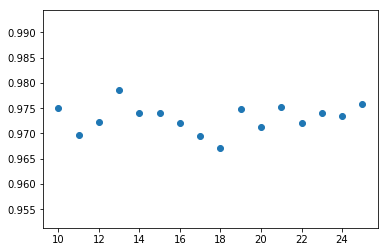

In [44]:
acc=-float("inf")
accuracy_list=[]
index_list=[]
index=0
for i in range(10,26):
    a,prediction=RF(i,15,25,'gini')
    print a,i
    index_list.append(i)
    accuracy_list.append(a)
    if a>=acc:
        acc=a
        index=i
        
print "the optimal number of nest for gini is:",index,"with accuracy of:",acc
plt.scatter(index_list,accuracy_list) 
plt.show()

# find the optimal number of depth and leaves with gini and optimal number of nests

In [45]:
err_list=[]
depth_list=[]
l_list=[]
final_list=[]

for d in range(1,50):
    for l in range(2,50):
        err,prediction=RF(13,d,l,'gini')
        err_list.append(err)
        depth_list.append(d)
        l_list.append(l)
        final_list.append((err,d,l))
        
        

optimal depth is : 25 optimal number of leaves is : 10 with accuracy : 0.984761904762


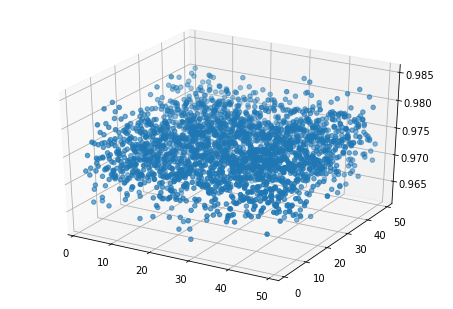

In [46]:
#from operator import itemgetter
sorted_err=sorted(final_list,key=itemgetter(0),reverse=True)
print "optimal depth is :",sorted_err[0][1],"optimal number of leaves is :",sorted_err[0][2], "with accuracy :",sorted_err[0][0]

#from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(l_list,depth_list,err_list)
plt.show()

# find the optimal number of nest for entropy

0.975657254138 10
0.978825794033 11
0.97480620155 12
0.967741935484 13
0.969668246445 14
0.96875 15
0.969696969697 16
0.973811833172 17
0.972088546679 18
0.977251184834 19
0.973581213307 20
0.975190839695 21
0.977648202138 22
0.972275334608 23
0.978764478764 24
0.97476635514 25
the optimal number of nest for entropy is: 11 with accuracy of: 0.978825794033


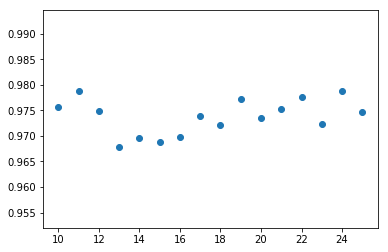

In [47]:
acc=-float("inf")
accuracy_list=[]
index_list=[]
index=0
for i in range(10,26):
    a,prediction=RF(i,15,25,'entropy')
    print a,i
    index_list.append(i)
    accuracy_list.append(a)
    if a>=acc:
        acc=a
        index=i
        
print "the optimal number of nest for entropy is:",index,"with accuracy of:",acc
plt.scatter(index_list,accuracy_list) 
plt.show()

# find the optimal number of depth and leaves with entropy and optimal number of nests

In [48]:
err_list=[]
depth_list=[]
l_list=[]
final_list=[]

for d in range(1,50):
    for l in range(2,50):
        err,prediction=RF(11,d,l,'entropy')
        err_list.append(err)
        depth_list.append(d)
        l_list.append(l)
        final_list.append((err,d,l))
        
        

optimal depth is : 24 optimal number of leaves is : 45 with accuracy : 0.985493230174


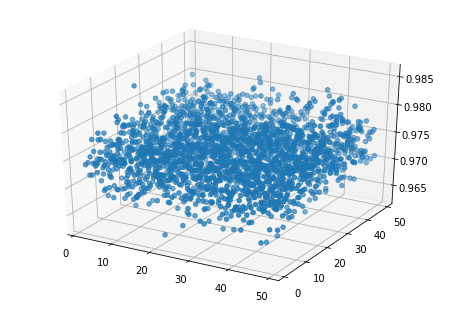

In [49]:
sorted_err=sorted(final_list,key=itemgetter(0),reverse=True)
print "optimal depth is :",sorted_err[0][1],"optimal number of leaves is :",sorted_err[0][2], "with accuracy :",sorted_err[0][0]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(l_list,depth_list,err_list)
plt.show()


# Use algorithm:entropy, #of nests:11,optimal depth: 24,optimal #of leaves: 45 to identify the most importand features

In [51]:
clf=DecisionTreeClassifier('entropy',max_depth=24,max_leaf_nodes=45)
def feature_importance():
    importance_list=[]
    for i in range(len(trainx[0])):
        class_vote_0=[0]*1000000
        class_vote_1=[0]*1000000
        final_prediction=[]
        
        for iteration in range(11):
            #####random bootstrap sample######
            s=[]
            v=[]
            index=range(0,1959)
            for x in range(int(0.632*1958)):
                s.append(random.randint(0,1958))
    
            for n in range(len(index)):
                #print train[n]
                if index[n] not in s:
                    v.append(index[n])

            bootstrapx=numpy.delete(trainx[s,:],i,1)
            bootstrapy=trainy[s]
            valx=numpy.delete(trainx[v,:],i,1)
            valy=trainy[v]
        
            clf.fit(bootstrapx,bootstrapy)
            valyHat=clf.predict(valx)
        
            for a in range(len(valyHat)):
                if valyHat[a]=='0':
                    class_vote_0[a]+=1
                else:
                    class_vote_1[a]+=1
        for a in range(len(valyHat)):
            if class_vote_0[a]>class_vote_1[a]:
                final_prediction.append(0)
            else:
                final_prediction.append(1)
        #print final_prediction
        err=0
        #print len(final_prediction),len(valy)
        for p in range(len(final_prediction)):
            if final_prediction[p]!=int(valy[p]):
                err+=1
    
        importance_list.append((i,1-float(err)/float(len(valx))))
    return importance_list

In [52]:
true_accuracy=0.985493230174
importance=[]
feature_importance_list=feature_importance()
for i in feature_importance_list:
    importance.append((i,abs(i[1]-true_accuracy)))

sorted_importance=sorted(importance,key=itemgetter(1),reverse=True)
print sorted_importance

[((0, 0.9667616334283001), 0.018731596745699908), ((24, 0.9698736637512148), 0.01561956642278528), ((18, 0.9702495201535508), 0.01524371002044922), ((10, 0.9703065134099617), 0.015186716764038377), ((14, 0.9706744868035191), 0.014818743370480947), ((7, 0.9707271010387157), 0.0147661291352843), ((9, 0.9715909090909091), 0.013902321083090974), ((17, 0.9719806763285024), 0.013512553845497655), ((5, 0.9732057416267943), 0.012287488547205738), ((1, 0.9732824427480916), 0.01221078742590842), ((6, 0.9740384615384615), 0.011454768635538515), ((3, 0.9742857142857143), 0.011207515888285724), ((13, 0.974609375), 0.010883855174000034), ((19, 0.9760536398467433), 0.00943959032725672), ((21, 0.9760765550239234), 0.009416675150076603), ((2, 0.9767225325884544), 0.008770697585545606), ((11, 0.9769230769230769), 0.00857015325092314), ((4, 0.9769452449567724), 0.00854798521722766), ((23, 0.9770992366412213), 0.008393993532778699), ((16, 0.9771210676835081), 0.008372162490491886), ((22, 0.977905859750240

the most important fove features are: 1st,24th,18th,10th and 14th, which will have the largest infulence on the accuarcy of prediction

In [4]:
clf=DecisionTreeClassifier('entropy',max_depth=24,max_leaf_nodes=45)
clf.fit(trainx,trainy)
prediction=clf.predict(testx)

In [5]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
f1=f1_score(testy, prediction, average='weighted')  
f2=fbeta_score(testy, prediction, average='weighted',beta=0.5)

In [6]:
print f1,f2

0.978256985439 0.977782966194


In [8]:
from sklearn import svm
clf = svm.SVC(C=1000,kernel='linear')
clf.fit(trainx,trainy)
trainyHat=clf.predict(trainx)
f2=fbeta_score(trainy, trainyHat, average='weighted',beta=0.5)
print f2

0.986775456095
